# OUTLIERS
### Description: Ways to detect and remove the outliers of UniVariant
### Refernces: www.datasciences.com
### Link: (https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
#### Author: Sravani.G & Monika.D
#### Revision: 1
#### Date: 05 Sep 2019

## Import Libraries

In [1]:

import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


####  *Boston House Pricing Dataset which is included in the sklearn dataset API. To load the dataset and separate out the features and targets.
#### *Matplotlib library is used to plot graphs from dataset.
#### *Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.
#### *stats are imputed to use statitics function from the scipy. scipy.stats has methods trim1() and trimboth() to cut the outliers out in a single row, according to the ranking and an introduced percentage of removed values.

## Finding Outliers

In [26]:

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

df_1 = boston_df.copy()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Discover outliers with visualization tools

### There are 4types
#### 1. Box plot
#### 2. Scatter plot
#### 3. Z Score
#### 4. IQR 

### 1. Box plot - It is a method for graphically depicting groups of numerical data through their quartiles.

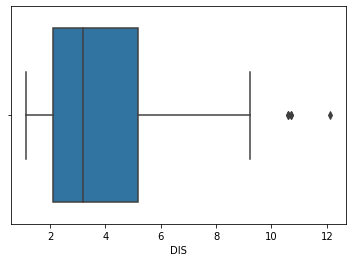

In [3]:

sns.boxplot(x=boston_df['DIS'])


In [4]:
boston_df["DIS"].describe()
 

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

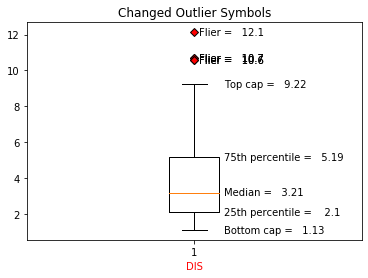

In [5]:
# Boxplot with all oulier values :

import matplotlib.pyplot as plt
import numpy as np

# Plot for DIS from dataframe:
 
x=boston_df['DIS']

def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')     # str.format() is one of the string formatting methods in Python3
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')    
#{ } .format(value) :  Returns a formatted string with the value passed as parameter in the placeholder position.
    
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')

    # Many fliers, so we loop over them and create a label for each one
    for flier in fly.get_ydata():
        ax.text(1 + xoff, flier,
                'Flier = {:6.3g}'.format(flier), va='center')

# Make the figure
red_diamond = dict(markerfacecolor='r', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')

# Create the boxplot and store the resulting python dictionary
my_boxes = ax3.boxplot(x, flierprops=red_diamond)

# Call the function to make labels
make_labels(ax3, my_boxes)
plt.xlabel("DIS", color = 'r')
plt.show()

In [6]:
boston_df["INDUS"].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

In [7]:
boston_df['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

### 2. Scatter plot - It is a type of plot or mathematical diagram using Cartesian coordinates,to display values for typically two variables for a set of data.

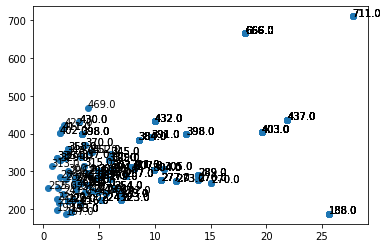

In [8]:
# sactter plot wih values:
x = boston_df["INDUS"]
y = boston_df["TAX"]
n = boston_df["TAX"]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
 

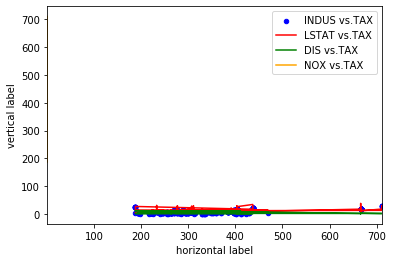

In [9]:
# Discover outliers with mathematical function for multiple variables.
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x = np.array(boston_df["TAX"])
a = np.array(boston_df["INDUS"])
b = np.array(boston_df["LSTAT"])
c = np.array(boston_df["DIS"])
d = np.array(boston_df["NOX"])

df = pd.DataFrame({"x":x, "a":a, "b":b, "c":c, "d":d})


ax = df.plot(kind="scatter", x="x",y="a", color="b", label="INDUS vs.TAX")
df.plot(x="x",y="b", color="r", label="LSTAT vs.TAX", ax=ax)
df.plot( x="x",y="c", color="g", label="DIS vs.TAX", ax=ax)
df.plot( x="d",y="x", color="orange", label="NOX vs.TAX", ax=ax)
# df.plot( x="a",y="x", color="purple", label="INDUS vs.TAX", ax=ax)

ax.set_xlabel("horizontal label")
ax.set_ylabel("vertical label")
plt.show()
             

### 3. Z-Score- This is the signed number of standard deviations, by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [10]:

z = np.abs(stats.zscore(boston_df))
print(z)


[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


##### Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.


In [11]:
cols = list(boston_df.columns)
#print(cols)
threshold = 3
new = (np.where(z > 3))
print(new)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [12]:
print(z[new[0][0]][new[1][0]])

3.375038763517309


In [13]:
# to get all oulier with values :
for i in range(0,len(new[0])):
    print(z[new[0][i]][new[1][i]])

3.375038763517309
3.1604409230624513
3.8042344444270246
3.134425327914092
3.049752140105825
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.5896366039721666
3.5896366039721666
3.0531420028350222
3.0531420028350222
3.5896366039721666
3.5896366039721666
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.4766880429269436
3.668397859712425
3.668397859712425
3.375038763517309
3.4467702107287455
3.010824655840693
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.668397859712425
3.375038763517309
3.668397859712425
3.375038763517309
3.1604409230624513
3.287299912742109
3.287299912742109
3.375038763517309
3.9605176870361265
3.228068918054187
3.228068918054187
3.668397859712425
3.668397859712425
3.668397859712425
3.66839785971242

##### Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [14]:
print(z[55][1])

3.375038763517309


### 4. IQR score - (Inter Quartile Range) - Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, this is need to use the mathematical formula and retrieve the outlier data.

#### IQR = Q3 − Q1

##### As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [15]:
 
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [16]:
print(("25 %:",Q1),("75%:",Q3))

('25 %:', CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Name: 0.25, dtype: float64) ('75%:', CRIM         3.677083
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT       16.955000
Name: 0.75, dtype: float64)


In [17]:
# calculate the outlier cutoff
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper = Q3 + cut_off
print(("lower :",lower), "upper:",upper)

('lower :', CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
dtype: float64) upper: CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
dtype: float64


In [18]:
boston_df = (boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))
print(boston_df)

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

In [19]:
for x in boston_df:
    cow = []
    for i in range(0, len(boston_df[x])):
        if boston_df[x][i]==True:
            cow.append(df_1[x][i])
    print(x,cow)
    

CRIM [13.5222, 9.2323, 11.1081, 18.4982, 19.6091, 15.288, 9.82349, 23.6482, 17.8667, 88.9762, 15.8744, 9.18702, 20.0849, 16.8118, 24.3938, 22.5971, 14.3337, 11.5779, 13.3598, 38.3518, 9.91655, 25.0461, 14.2362, 9.59571, 24.8017, 41.5292, 67.9208, 20.7162, 11.9511, 14.4383, 51.1358, 14.0507, 18.811, 28.6558, 45.7461, 18.0846, 10.8342, 25.9406, 73.5341, 11.8123, 11.0874, 12.0482, 15.8603, 12.2472, 37.6619, 9.33889, 10.0623, 13.9134, 11.1604, 14.4208, 15.1772, 13.6781, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 9.51363, 15.5757, 13.0751, 15.0234, 10.233, 14.3337]
ZN [75.0, 75.0, 75.0, 90.0, 85.0, 100.0, 80.0, 80.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 60.0, 60.0, 80.0, 80.0, 80.0, 80.0, 95.0, 95.0, 82.5, 82.5, 95.0, 95.0, 80.0, 80.0, 90.0, 40.0, 40.0, 40.0, 40.0, 40.0, 90.0, 90.0, 55.0, 80.0, 52.5, 52.5, 52.5, 80.0, 80.0, 80.0, 70.0, 70.0, 70.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 35.0, 35.0, 35.0, 55.0, 55.0, 85.0, 80.0, 40.0, 40.0, 60.0, 60.0, 90.0, 80.

## Working with Outliers: Correcting, Removing

#### previously Z-score has done one can detect the outlier using Z-score but now we need to remove or filter the outliers and get the clean data.

In [20]:

boston_df_o = boston_df[(z < 3).all(axis=1)]
boston_df_o.shape



(415, 13)

#### IQR Score - Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [21]:
 
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape
# The above code will remove the outliers from the dataset

(0, 13)

* NOTE : 'Outlier' is a convenient term for collecting data together that doesn't fit what you expect your process to look like, in order to remove from the analysis.

* But to remove ouliers always is not a  good option.When we deal with large volumes of automatically generated time-series data which is processed using a run chart / moving box plot / etc. depending on the data and distribution on which we are working ,wether to delete or keep the outliers.

## Summary:

### OUTLIER : An Outlier is a data point that differs significantly from other observations. It may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. It can cause serious problems in statistical analyses.

### Outlier can be of two types: Univariate and Multivariate.univariate outlier:These outliers can be found when we look at distribution of a single variable. Multi-variate outliers : are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.
* To detect Univariate outliers we generally use :1)Box plo 2) Z- scores (parametric),3)IQR methods, 
* To detect Multivariate ouliers we prefer :1) Isolation Forest 2) Eliptic Envelope 3)LocalOutlier factor 4)
## What causes Outliers?

* Artificial (Error) / Non-natural
*  Natural.

## What is the impact of Outliers on a dataset?
#### Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
* It increases the error variance and reduces the power of statistical tests
* If the outliers are non-randomly distributed, they can decrease normality

* Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot.

## 1) Box plot using seaborn Library:

* Bottom black horizontal line of blue box plot is minimum value
* First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
* Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
* Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
* Top black horizontal line of rectangle shape of blue box plot is maximum value.
* Small diamond shape of blue box plot is outlier data or erroneous data.
## 2) The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
* Formula for Z score = (Observation — Mean)/Standard Deviation
#### z = (X — μ) / σ

## 3) IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
* The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
* IQR usually identifies outliers with their deviations when expressed in a box plot. Observations below Q1- 1.5 IQR, or those above Q3 + 1.5IQR (note that the sum of the IQR is always 4) are defined as outliers.

## Code Used :
#### * boston = load_boston() : to load the data from the library.
#### * sns.boxplot(x=boston_df['DIS']) : this command is used for depicting grops of numerical data in box plot.
#### * ax = plt.subplots(figsize=(16,8)) : it is used to mention size of figure.
#### * plt.scatter(,) : this is used to plot graph in scatter plot/ style.
#### * z = np.abs(stats.zscore(DataFrame)) : This is signed number of standard deviations, by which the value of an observation above the mean value of being observed.
#### * In Z-Score plot we use threshold, to identify outlier easily.
#### * Assuming Q1 and Q3 = boston_df.quantile(0.25 and 0.75) to find the IQR.
#### * boston_df = (boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR)) : In this method it presents true and false values of data, if it is true  then there is an outlier.
#### * botson_df_o = boston_df[(z<3).all(axis=1)] : used to detect outliers and remove them.
#### * boston_df_out = boston_df[~((boston_df,(Q1-1.5*IQR))|(boston_df>(Q3+1.5*IQR))).any(axis=1)] : It is used to keep only valid values of the data.
#### * boston_df_o.shape : Is to mention the size of outliers as array